# Insult Detection Model

### Project by 
#### Chirag Khurana, Pallavi S. Rawat, Shubham Goyal

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import auc, roc_auc_score, roc_curve

import pandas as pd
import numpy as np
import spacy

## Importing Data Set 

In [2]:
# Unprocessed Data
full_df = pd.read_csv('../data/train.csv')
verify_df = pd.read_csv('../data/impermium_verification_labels.csv')
data = full_df.append(verify_df)
data.Comment = [x[1: -1] for x in data.Comment]

# Processed Data
full_df = pd.read_csv('../data/processed/train.csv')
verify_df = pd.read_csv('../data/processed/impermium_verification_labels.csv')
pdata = full_df.append(verify_df)

#### Trying cleaning stop words

In [3]:
nlp = spacy.load('en')
def sanitize_wo_stopwords(sentence):
    doc = nlp(sentence)
    s = []
    for token in doc:
#         print(token.dep_)
        if str(token.pos_) != 'SPACE' and not token.is_stop:
            s.append(token.text)
    return ' '.join(s)

def sanitize_with_words(sentence):
    doc = nlp(sentence)
    s = []
    for token in doc:
#         print(token.dep_)
        if str(token.pos_) != 'SPACE' and not token.is_stop:
            s.append(token.text)
    return ' '.join(s)


def sanitize_with_lemma(sentence):
    doc = nlp(sentence)
    s = []
    for token in doc:
#         print(token.dep_)
        if str(token.pos_) != 'SPACE':
            s.append(token.lemma_)
    return ' '.join(s)

In [4]:
# pdata.Comment = [sanitize_wo_stopwords(x[1: -1]) for x in pdata.Comment]
# full_df.Comment = [sanitize_with_words(x[1: -1]) for x in full_df.Comment]
# full_df.Comment = [sanitize_with_lemma(x[1: -1]) for x in full_df.Comment]


pdata.Comment = [x[1: -1] for x in pdata.Comment]

## Understanding Data 

In [5]:
data.describe()

,Insult,id
count,6182.000000,2235.000000
mean,0.343902,1118.000000
std,0.475047,645.333247
min,0.000000,1.000000
25%,0.000000,559.500000
50%,0.000000,1118.000000
75%,1.000000,1676.500000
max,1.000000,2235.000000


In [6]:
data.head()

,Comment,Date,Insult,Usage,id
0,You fuck your dad.,20120618192155Z,1,NaN,NaN
1,i really don't understand your point.\xa0 It s...,20120528192215Z,0,NaN,NaN
2,A\\xc2\\xa0majority of Canadians can and has b...,NaN,0,NaN,NaN
3,listen if you dont wanna get married to a man ...,NaN,0,NaN,NaN
4,C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1eddn...,20120619094753Z,0,NaN,NaN


In [7]:
pdata.head()

,Insult,Date,Comment
0,1,20120618192155Z,you fuck you are dad.
1,0,20120528192215Z,i really do not understand you are point. it s...
2,0,NaN,a majority of canadians can and has been wrong...
3,0,NaN,listen if you dont wanna get married to a man ...
4,0,20120619094753Z,c b xu bi t 2011 c ho kh ? c ng d ng cu chi nh...


In [8]:
pdata_ni = pdata.query('Insult == 0')
pdata_i = pdata.query('Insult == 1')
pdata_ni.shape, pdata_i.shape

((4056, 3), (2126, 3))

In [9]:
ptrain_ni, ptest_ni = train_test_split(pdata_ni, test_size=0.6)
print(ptrain_ni.shape, ptest_ni.shape)

ptrain_i, ptest_i = train_test_split(pdata_i, test_size=0.2)
print(ptrain_i.shape, ptest_i.shape)

(1622, 3) (2434, 3)
(1700, 3) (426, 3)


### Splitting Dataset

In [10]:
# train, test = train_test_split(data, test_size=0.2)
# ptrain, ptest = train_test_split(pdata, test_size=0.2)
ptrain = ptrain_i.append(ptrain_ni)
ptest = ptest_i.append(ptest_ni)

## Feature Extraction

#### TFIDF as feature

tfidf_w = TfidfVectorizer(ngram_range=(1, 3), analyzer='word', use_idf=False, max_features=50000) 
tfidf_c = TfidfVectorizer(ngram_range=(3, 10), analyzer='char', use_idf=False, max_features=100000)

ptrain_data_w = tfidf_w.fit_transform(ptrain.Comment)
ptrain_data_c = tfidf_c.fit_transform(ptrain.Comment)

ptrain_data_w.shape, ptrain_data_c.shape

In [11]:
#### TEST ####

In [13]:
import spacy
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
# from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
nlp=spacy.load('en')

MemoryError: Error assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytesError assigning 33554432 bytes

In [ ]:
def fetchlist(file):
    filecontent=open(file)
    lines=filecontent.readlines()
    l=[]
    for line in lines:
        l.append(line.strip())
    #print(list)
    return l

def customfind(sent,phrase):
    pp=phrase.split(" ")
    if len(pp)>1:
        if sent.find(phrase)!=-1:
            return True;
    else:
        words=sent.split(" ")
        for word in words:
            if(word==phrase):
                return True
    return False

In [ ]:
from sklearn.base import BaseEstimator


class DensifyTransformer(BaseEstimator):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if sparse.issparse(X):
            X = X.toarray()
        return X


class CleanTransformer(BaseEstimator):

    def __init__(self):
        self.badlist = fetchlist('sortedBadWords_for_checking.txt')
        self.goodlist = fetchlist('positives.txt')
#         with open('badlist.txt') as file:
#             badwords = [line.strip() for line in file.readlines()]
#         self.badwords = badwords
        
    def get_feature_names(self):
        return np.array(['bcount', 'bratio', 'gcount', 'gratio', 'bgratio', 'len_ratio',
            'caps_ratio', 'off_score', 'lex1', 'lex2'])

    def fit(self):
        return self

    def transform(self, docs):
        bcount = []
        bratio = []
        gcount = []
        gratio = []
        bgratio = []
        len_ratio = []
        caps_ratio = []
        off_score = []
        lex1 = []
        lex2 = []
        

        for i, doc in enumerate(docs):
            print(i, doc)
#             bcount_ ,bratio_ = self._bad_count(doc, self.badlist)
#             bcount.append(bcount_)
#             bratio.append(bratio_)
            
#             gcount_ ,gratio_ = self._good_count(doc, self.goodlist)
#             gcount.append(gcount_)
#             gratio.append(gratio_)
            
#             bgratio.append(bcount_ / float(gcount_))
            
#             len_ratio.append(self._sent_len_ratio(doc, 50))
            
#             caps_ratio.append(self._caps_ratio(doc))
            send_list = [0,1.5,.6,0,1,.4,.6,.3,.15,.8,.45]
            off_score.append(self._offense_score(doc, send_list, self.badlist, self.goodlist))
#             lex1.append(self._lex_score1(doc, self.badlist))
#             lex2.append(self._lex_score2(doc, self.badlist))
            
            
            
#             n_words.append(len(doc.split()))
#             n_chars.append(len(doc))
#             caps.append()
#             caps_ratio.append(np.sum([c.isupper() for c in doc]) / len(doc))

        return np.array([bcount, bratio, gcount, gratio,
                         bgratio, len_ratio, caps_ratio, off_score, lex1, lex2]).T
    
    def _bad_count(self, document, badlist):
        count=0
        for phrase_ in badlist:
            if customfind(document,phrase_):
                #print(phrase_)
                count=count+1
        wl = len(word_tokenize(document))
        if wl == 0:
            print(document)
        return [count, count*10/float(wl)]
    
    def _good_count(self, document, goodlist):
        count=1
        for phrase_ in goodlist:
            if customfind(document,phrase_):
                #print(phrase_)
                count=count+1
        return [count,count*10/float(word_tokenize(document).__len__())]
    
    def _sent_len_ratio(self,sentence, shortis):
        short_sent=0
        sent_tokens=sent_tokenize(sentence)
        for sent in sent_tokens:
            if len(sent) <= shortis:
                short_sent=short_sent+1
        return float(short_sent)/sent_tokens.__len__()
    
    def _caps_ratio(self, document):
        uc_token=0
        w_tokens=word_tokenize(document)
        words_analysed=0
        #print(w_tokens)
        for word in w_tokens :
            #print(word)
            if len(word) > 1 and (word!="'s" and word !="'S" and word !="'ll" and word !="'LL" and word !="n't" and word !="N'T" and word !="'re" and word !="'RE" and word !="'d" and word !="'D" and word !="'ve" and word !="'VE"):
                    words_analysed=words_analysed+1

                    if word.isupper():
                        uc_token=uc_token +1
                    #print(word, words_analysed, uc_token)
        val = uc_token/float(words_analysed)
        return val
    
    def _offense_score(self, document, in_list, badlist, goodlist):
        s1=in_list[0]
        s2=in_list[1]
        s3=in_list[2]
        s4=in_list[3]
        s5=in_list[4]
        s6=in_list[5]
        s7=in_list[6]
        s8=in_list[7]
        s9=in_list[8]
        s10=in_list[9]
        s11=in_list[10]
    #s1 -for not in sibling -0
    #s2 -for you in sibling -1.5
    #s3 -for they in sibling -0.6
    #s4 -for 'nor, neither' in descendant -0
    #s5 -for you in descendant -1
    #s6 -for they in descendant -0.4
    #s7 -for you in parent's child -.6
    #s8 - for they in parent's child - .3
    #s9 - for otherwise -.2
    #s10 -for niece you - .8
    #s11 -for niece they - .45

        wordlist=['yourself','your','yours','you','he','her','she','his','they','their','them','not','never','nobody','neither','nor','it','its']
        document=document.lower()
        doc = nlp(document)  
        sentences_in_doc = doc.sents
        #print(doc)
        Flag=False
        #displacy.serve(doc, style='dep')
        score=0
        token_no=0
        for token in doc:
            #check if token is a curse word
            Flag=False
            stemmedword=ps.stem(token.text)
            if token_no + 1 < len(doc) and doc[token_no + 1].text in goodlist:
                Flag=True
            else:
                break
            if Flag:
                continue
            for child in token.head.children:
                if child.text=='not' or child.text=='never' or child.text=='nobody':  #child.text=='not' or child.text='never' or 
                    score=score+s1
                    Flag=True
                    break
            if Flag:continue
            for child in token.head.children:

                if child.text=='you'or child.text=='yourself' or child.text=='your' or child.text=='yours' or child.text=='it' or child.text=='its':
                    score=score+s2
                    #print("Rule--",child)
                    Flag=True
                    break
            if Flag:continue
            for child in token.head.children:
                if child.text=='they' or child.text=='he' or child.text=='she' or child.text=='her' or child.text=='their' or child.text=='them' or child.text=='his':
                    score=score+s3
                    Flag=True
                    break
            if Flag:continue

            #analysing 'descendant' relation
            for node in token.children:
                if node.text=='neither' or node.text=='nor': #node.text=='not' or node.text='never' or
                    score=score+s4       #first descendant relation 
                    Flag=True
                    break
                else:
                    for nodechild in node.children:
                        if nodechild.text=='neither' or nodechild.text=='nor':
                            score=score+(s4/2)     #grandchild descendant so score is halved
                            Flag=True
                            break              
            if Flag:continue
            for node in token.children:
                if node.text=='you' or child.text=='yourself' or node.text=='your' or node.text=='yours' or node.text=='it' or node.text=='its':
                    score=score+s5   
                    #print("Rule--",node)
                    Flag=True
                    break;
                else:
                    for nodechild in node.children:
                        if nodechild.text=='you' or child.text=='yourself' or nodechild.text=='your' or nodechild.text=='yours' or nodechild.text=='it' or nodechild.text=='its':
                            score=score+(s5/2)
                            #print("Rule--",node)
                            Flag=True
                            break  
            if Flag:continue
            for node in token.children:
                if node.text=='they' or node.text=='he' or node.text=='she' or node.text=='her' or node.text=='their' or node.text=='them' or node.text=='his':
                    score=score+s6
                    Flag=True
                    break;
                else:
                    for nodechild in node.children:
                        if nodechild.text=='they' or nodechild.text=='he' or nodechild.text=='she' or nodechild.text=='her' or nodechild.text=='their' or nodechild.text=='them' or nodechild.text=='his':
                            score=score+(s6/2)
                            Flag=True
                            break
            if Flag:continue
            #analysing niece relation
            father=token.head
            #print("pohcha",father)
            for child in father.children:
                if child !=token:
                    for grandchild in child.children:
                        if grandchild.text=='you' or child.text=='yourself' or grandchild.text=='your' or grandchild.text=='yours' or grandchild.text=='it' or grandchild.text=='its':
                            score=score+s10
                            #print("Rules--",child)
                            Flag=True
                            break;
            if Flag:continue
            for child in father.children:
                if child !=token:
                    for grandchild in child.children:
                        if grandchild.text=='they' or grandchild.text=='he' or grandchild.text=='she' or grandchild.text=='her' or grandchild.text=='their' or grandchild.text=='them' or grandchild.text=='his':
                            score=score+s11
                            #print("Rules--",child)
                            Flag=True
                            break;
            if Flag:continue
            #analysing 'UNCLE' relation
            if father.dep_!='ROOT':
                for desc in father.head.children:
                    if desc.text=='you' or child.text=='yourself' or desc.text=='your' or desc.text=='yours' or desc.text=='it' or desc.text=='its':
                        score=score+s7
                        #print("Rule--",desc)
                        Flag=True
                        break;
                if Flag:continue
                for desc in father.head.children:
                    if desc.text=='they' or desc.text=='he' or desc.text=='she' or desc.text=='her' or desc.text=='their' or desc.text=='them' or desc.text=='his':
                        score=score+s8
                        Flag=True
                        break;
            if Flag:
                continue
            else:
                score=score+s9
                #print("Rule--last")
            token_no=token_no+1
        return score
    
    def _lex_score1(self, document, badlist):
        nlp.vocab["you"].is_stop = False
        nlp.vocab["your"].is_stop = False
        nlp.vocab["yours"].is_stop = False
        nlp.vocab["yourself"].is_stop = False
        document=document.lower()  
        sentences_l=sent_tokenize(document)
        #doc=nlp(document)
        lexscore=0
        #sent_count=0
        for sentence in sentences_l:
            doc=nlp(sentence)
            #print(doc)
            badindexes=[]
            youindexes=[]
            for i in range (0,doc.__len__()):
        #         token=doc[i].lemma_
                #print(doc[i],"---",doc[i].is_stop)
                if(not doc[i].is_stop):
                    if doc[i].text=='you' or doc[i].text=='your' or doc[i].text=="your's" or doc[i].text=='yours' or doc[i].text=='yourself':
                        #print(i)
                        youindexes.append(i)
                        continue
                    if badlist.__contains__(doc[i].text): ##or badlist.__contains__(token.lemma_):
                        badindexes.append(i)
                        continue
            for badindex in badindexes:
                for youindex in youindexes:
                    lexscore=lexscore+abs(badindex-youindex)   
        nlp.vocab["you"].is_stop = True
        nlp.vocab["your"].is_stop = True
        nlp.vocab["yours"].is_stop = True
        nlp.vocab["yourself"].is_stop = True
        return lexscore/float(sentences_l.__len__())
    
    def _lex_score2(self, document, badlist):
        nlp.vocab["you"].is_stop = False
        nlp.vocab["your"].is_stop = False
        nlp.vocab["yours"].is_stop = False
        nlp.vocab["yourself"].is_stop = False
        document=document.lower() 
    #     sentence=nlp(document)
        lexscore=0
        doc=nlp(document)
    #     sent_count=0
    #         sent_count=sent_count+1

            #print(doc)
        badindexes=[]
        youindexes=[]
        for i in range (0,doc.__len__()):
        #         token=doc[i].lemma_
                #print(doc[i],"---",doc[i].is_stop)
            if(not doc[i].is_stop):
                if doc[i].text=='you' or doc[i].text=='your' or doc[i].text=="your's" or doc[i].text=='yours' or doc[i].text=='yourself':
                        #print(i)
                    youindexes.append(i)
                    continue
                if doc[i].text in badlist: #has(badlist,doc[i].text):#badlist.__contains__(token) or badlist.__contains__(token.lemma_):
                    badindexes.append(i)
                    continue
        for badindex in badindexes:
            for youindex in youindexes:
                lexscore=lexscore+abs(badindex-youindex)   
        nlp.vocab["you"].is_stop = True
        nlp.vocab["your"].is_stop = True
        nlp.vocab["yours"].is_stop = True
        nlp.vocab["yourself"].is_stop = True
        return lexscore/float(doc.__len__())
                     

In [81]:
myfeat = CleanTransformer()

In [82]:
myfeat_data = myfeat.transform(ptrain.Comment)

0 well guess what. i do not give a fuck lol is mom though get you are english right nigga!!
1 you are very ignorant.
2 don't get out of you are cave much, do you.
3 how stupid are you? do you realize that many women take birth control pills for many reasons besides preventing pregnancy? educate yourself,fool.
4 notheism: are you serious? how can you say this is "revenge". the rapist was caught in the act. i understand you are ignorance, but for god sakes, pick up a dictionary.
5 how do you expect financial companies to continue their ridiculous compensation and bonus plans. get off you are useless little people duffs and feed these of the best and brightest. just who do you think you are?? do you not know you are place?
6 makes you a filthy nasty poor trash racist loser.
7 you are an evil despicable animal, and i'm sure eventually you will get yours. god has a special plan for vile creatures like you.
8 shouldn't you be at you are lamaze class?
9 you suck coffey
10 whiny bastard. you a

130 there is very little evidence that this happens often. instead, you have many rape victims never getting justice for brutal crimes against them. i get the sense that there are a lot of potential rapists here on this board, who would certainly rape if they could get away with it.
131 omg now i feel sorry for you that was just pitful. enough trying to converse with trailer park formaldehyde damaged brains. step outside once and a while people
132 oh god! grow up you sad little loser!
133 got a problem with haitian people dumb fuck. he is not even haitian ignorant ass nigga
134 when you blacks take a shit does it come out purple? when you piss does it come out green?
135 you are an idiot if you still believe those lies after it is been exposed as a complete lie.why are you repigs so freakin' stupid anyway? 
136  usual you are clueless. 
137 is that it?? you are sum total to any conversation is first abuse and then calling them a troll.. you are a typical socialist idiot. keep up you a

244 you are a fucking loon. seriously. you really come across as someone with mental illness. no emoticons. i think you are seriously unhinged and you need some help. whoever hurt you, or whatever happened you need to get that addressed, because frank,y, you are behavior suggest we will read about you in some mass shooting. and yes, you indeed hate men. in almost every thread i have seen of yours, you just go ballistic toward men n general. get help. seriously.
245 oh bore off you stupid twat !
246 oh dear the right wing retards have picked up this article. i know the ave iq of right wing idiots is significantly less than the average human being, to be fair my pet monkey has a higher iq and he is on drugs. naughty monkey. he is due a slapping later. oh yeah, i was going to ask if the right wingers are rooting for war on behalf of israel. boeing, lockeed, rayathon etc, attackking babies in arms with cruise missiles must make you all proud to be a merican. do not forget to claim it is go

346 you goofy repub thugs do not have a clue, not the tiniest shred of a fact on how health care works in most other countries around the globe. the us is the only developed country without universal, single-payer or socialized medical care for all its citizens. some systems differ, but all achieve near 100% access to a doctor and hospital at way lower cost than we here in the united states of america. in some countries, people pay some small amount per doctor visit, like a co-pay. in other countries, you are covered, no co-pay. in most countries, the option to have private health insurance is always an option. this gives the wealthy or well-heeded access to some private doctors who want to only see rich patients. their choice. but no one, no mom, dad, child, uncle, aunt, grandma, grandpa, sister, brother, business associate, boss, garbage man, ditch digger, or nuclear physicist goes bankrupt from a disease or medical condition like here in the usa. you need not fear the collection age

460 yeah life a programmer behind the keyboard do me a favor no really i really need you to do me a favor alot of people think diffent than you do but since you want to come out you are face tough computer screen guy do me a favor and suck my dick ok no beat it cock sucker. doc
461 cheap references to nazi germany, you dont know how good you have in this country a-hole!
462 you too, please. unless you do not consider weed a drug. then you are just dumb.
463 you are the real -PRON- le and i hope people on here realize that you are a pretender
464 aww, you poor little cowardly redneck strong intelligent black woman scares you it must be sad to live life as a right wing redneck cowardly pansy
465 if it proves anything, it proves that you are not an idiot.
466 you are an idiot!
467 you are not only dumb, you are pathetic!
468 go eat some ships and shut the fuck up .you are nothing but a stupid
469 thank you speak the fucking truth real niggas dont gotta rap about work if you got skills fuc

589 i pull nothing from you, hanni. but, keep parroting me, in lieu of thinking for yourself. it will at least make you sound a little smarter than you really are.
590 so freaking busy . so little time, so many fucking idiot sheeple! i struggle to understand the depths that the zit-club has sunk to. is like a never ending sucking machine pulling them down down down further trapped in the maze of their own delusions. ? ? is devoted a post . an entire post! to the discussion of hands, complete with blown up pictures and pie charts and hair follicles under the microscope. do hope she realizes that she cannot get a dna sample from a picture that kate posted on her twitter account.
591 haney you suck as a painter.keep you are day job.wait you suck at that too
592 did you really ask why wvu was ranked ahead of fsu? are you dumb?
593 liberals do not want military intervention, you buffoon.
594 and you are comment is three times as dumb as some already dumb comments i have read here by fellow 

691 then you let the hoes fight you dont jump in .dog you a bitch for even saying that shit.. this what i am talking about bitch ass niggas .doing bitch ass shit all day .aint no excuse for hitting a woman in that situation. dude suspect for that mess
692 f uck off loser colon cowboy. go back to you are boyfriend is filthy, dirty, hair, bacteria infested ass hole and hope that when you pull you are c ock out it is not too brown. or does someone else is s hit on you are cock turn you on. you and you are type are sick, disgusting perverts.
693 dick face you would do shit fake ass 
694 -PRON-:disqus read through the comments on this thread and you are the definition of a dick rider. i bet you have a poster of 50 in you are room.
695 stfu you are existence offends me
696 how about you start acting like a real feminine woman and shut the fuck up. you are a virgo as well? smh
697 or go home and kill you are wife and son then yourself -chris benoit (white guy)
698 you are really freaking high

ZeroDivisionError: float division by zero

KeyError: (800,)

## Classification of Insult

#### Helper Functions

In [14]:
def normalize_mat(mat):
    m = []
    for i, row in enumerate(mat):
        m.append([float(x / sum(row)) for x in row])
    return np.array(m)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Multinomial NaiveBayes

In [47]:
insult_nb_w = MultinomialNB(alpha=0.01)
insult_nb_w.fit(ptrain_data_w, ptrain.Insult)

insult_nb_c = MultinomialNB(alpha=0.01)
insult_nb_c.fit(ptrain_data_c, ptrain.Insult)

ptest_data_w = tfidf_w.transform(ptest.Comment)
ptest_data_c = tfidf_c.transform(ptest.Comment)

predicted_nb_w = insult_nb_w.predict(ptest_data_w)
predicted_nb_c = insult_nb_c.predict(ptest_data_c)
print(np.mean(predicted_nb_w == ptest.Insult), np.mean(predicted_nb_c == ptest.Insult))
predicted_nb_w_prob = insult_nb_w.predict_proba(ptest_data_w)
predicted_nb_c_prob = insult_nb_c.predict_proba(ptest_data_c)

0.663286713287 0.735664335664


#### Confusion Matrix for NB Classifier on Word - N-grams

Normalized confusion matrix


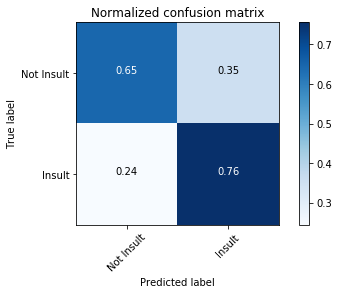

In [48]:
# Compute confusion matrix
cnf_matrix_w = confusion_matrix(ptest.Insult, predicted_nb_w)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix_w, classes=['Not Insult', 'Insult'],
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_w, classes=['Not Insult', 'Insult'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Confusion Matrix for NB Classifier on Character - N-grams

Normalized confusion matrix


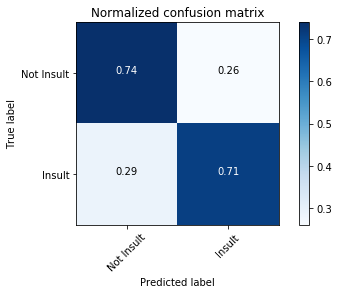

In [49]:
# Compute confusion matrix
cnf_matrix_c = confusion_matrix(ptest.Insult, predicted_nb_c)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix_c, classes=['Not Insult', 'Insult'],
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_c, classes=['Not Insult', 'Insult'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### LinearSVC

In [28]:
insult_svm_w = LinearSVC()
insult_svm_w.fit(ptrain_data_w, ptrain.Insult)

insult_svm_c = LinearSVC()
insult_svm_c.fit(ptrain_data_c, ptrain.Insult)

ptest_data_w = tfidf_w.transform(ptest.Comment)
ptest_data_c = tfidf_c.transform(ptest.Comment)

predicted_svm_w = insult_svm_w.predict(ptest_data_w)
predicted_svm_c = insult_svm_c.predict(ptest_data_c)
np.mean(predicted_svm_w == ptest.Insult), np.mean(predicted_svm_c == ptest.Insult)

(0.73881118881118879, 0.76503496503496504)

#### Confusion Matrix for SVM Classifier on Word - N-grams

Normalized confusion matrix


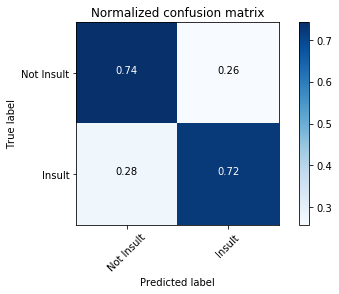

In [29]:
# Compute confusion matrix
cnf_matrix_w = confusion_matrix(ptest.Insult, predicted_svm_w)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix_w, classes=['Not Insult', 'Insult'],
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_w, classes=['Not Insult', 'Insult'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Confusion Matrix for SVM Classifier on Character - N-grams

Normalized confusion matrix


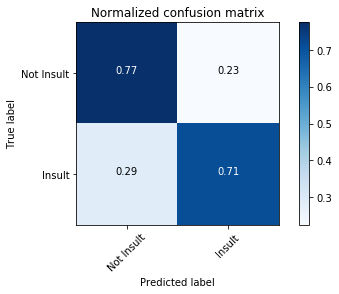

In [30]:
# Compute confusion matrix
cnf_matrix_c = confusion_matrix(ptest.Insult, predicted_svm_c)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix_c, classes=['Not Insult', 'Insult'],
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_c, classes=['Not Insult', 'Insult'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Logistic Regression

In [43]:
insult_lr_w = LogisticRegression()
insult_lr_w.fit(ptrain_data_w, ptrain.Insult)

insult_lr_c = LogisticRegression()
insult_lr_c.fit(ptrain_data_c, ptrain.Insult)

ptest_data_w = tfidf_w.transform(ptest.Comment)
ptest_data_c = tfidf_c.transform(ptest.Comment)

predicted_lr_w = insult_lr_w.predict(ptest_data_w)
predicted_lr_c = insult_lr_c.predict(ptest_data_c)
print(np.mean(predicted_lr_w == ptest.Insult), np.mean(predicted_lr_c == ptest.Insult))
predicted_lr_w_prob = insult_lr_c.predict_proba(ptest_data_w)
predicted_lr_c_prob = insult_lr_c.predict_proba(ptest_data_c)

0.76048951049 0.783566433566


ValueError: X has 50000 features per sample; expecting 100000

#### Confusion Matrix for Logistic Regression Classifier on Word - N-grams

Normalized confusion matrix


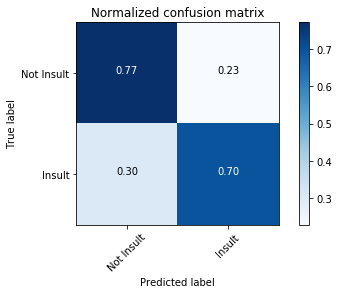

In [33]:
# Compute confusion matrix
cnf_matrix_w = confusion_matrix(ptest.Insult, predicted_lr_w)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix_w, classes=['Not Insult', 'Insult'],
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_w, classes=['Not Insult', 'Insult'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Confusion Matrix for Logistic Regression Classifier on Character - N-grams

Normalized confusion matrix


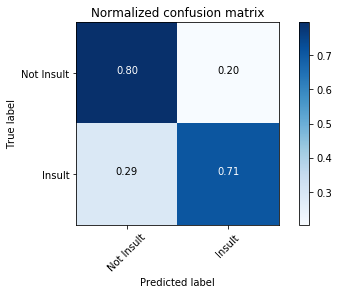

In [44]:
# Compute confusion matrix
cnf_matrix_c = confusion_matrix(ptest.Insult, predicted_lr_c)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix_c, classes=['Not Insult', 'Insult'],
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_c, classes=['Not Insult', 'Insult'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

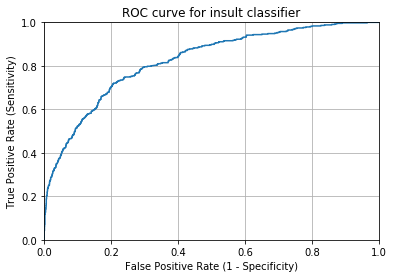

In [52]:
fpr, tpr, thresholds = roc_curve(ptest.Insult, predicted_lr_c_prob[:, 1:])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for insult classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [70]:
print(roc_auc_score(ptest.Insult, predicted_lr_c_prob[:, 1:]), roc_auc_score(ptest.Insult, predicted_lr_w_prob[:, 1:]))

NameError: name 'predicted_lr_c_prob' is not defined